In [ ]:
#importing necessary libraries and dataset from google drive
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
!pip install tablib
from google.colab import drive
import tablib
drive.mount('/content/gdrive')
data = tablib.Dataset('/content/gdrive/My Drive/European Soccer Database', delimiter=',')
print(data)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/|c|o|n|t|e|n|t|/|g|d|r|i|v|e|/|M|y| |D|r|i|v|e|/|E|u|r|o|p|e|a|n| |S|o|c|c|e|r| |D|a|t|a|b|a|s|e


In [ ]:
#importing CSVs form the dataset
country = pd.read_csv('/content/gdrive/My Drive/European Soccer Database/Country.csv')
league = pd.read_csv('/content/gdrive/My Drive/European Soccer Database/League.csv')
matches = pd.read_csv('/content/gdrive/My Drive/European Soccer Database/Match.csv')
player_attributes = pd.read_csv('/content/gdrive/My Drive/European Soccer Database/Player_Attributes.csv')
player = pd.read_csv('/content/gdrive/My Drive/European Soccer Database/Player.csv')
team_attributes = pd.read_csv('/content/gdrive/My Drive/European Soccer Database/Team_Attributes.csv')
team = pd.read_csv('/content/gdrive/My Drive/European Soccer Database/Team.csv')

In [ ]:
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


This dataset focuses on 5 European Countries.

In [ ]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


The names of the leagues pertaining to the countries are:
1. Belgium: Jupiler League
2. England: Premier League
3. France: Ligue 1
4. Germany: Bundesliga
5. Italy: Serie A

In [ ]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


The dataset includes matches played in all the leagues from 2008/09 to 2015/16

In [ ]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


This provides information on attributes of the player, which is player's preferred shooting foot, vision, crossing, work rate, etc.

In [ ]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


This provides information about player's name, birthday, height and weight of the players accross the 5 countries league.

In [ ]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


This provides information on how teams accross the leagues prefer to play in different styles.

In [ ]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


This provides the team names in the leagues mentioned in the dataset.

## **Analysing match data**

In [ ]:
#checking null values
matches.isnull().sum()
matches.fillna(0,inplace=True)

In [ ]:
#player performance and statistics
#calculating the total goals scored by each player:
player_goals = pd.concat([matches[['home_player_{}'.format(i) for i in range(1,12)]].stack(), matches[['away_player_{}'.format(i) for i in range(1,12)]].stack()]).reset_index(drop=True)
player_goals.name = 'player_id'
player_goals= player_goals.to_frame().join(pd.concat([matches['home_team_goal'], matches['away_team_goal']]).reset_index(drop=True).to_frame(name='goals'))
player_goals.groupby('player_id')['goals'].sum().sort_values(ascending=False)

player_id
0.0         4028.0
40695.0      196.0
23782.0      168.0
30859.0      164.0
24846.0      161.0
             ...  
42346.0        0.0
42352.0        0.0
42353.0        0.0
42357.0        0.0
750584.0       0.0
Name: goals, Length: 11061, dtype: float64

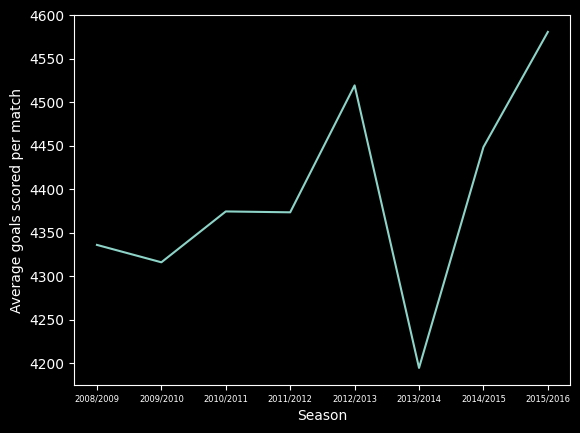

In [ ]:
#seasonal trends and patterns
#calculating the average goals scored per season
avg_goals_per_season = matches.groupby('season')[['home_team_goal', 'away_team_goal']].sum().mean(axis=1)

#plotting the average goals scored per season
plt.plot(avg_goals_per_season.index, avg_goals_per_season.values)
plt.xlabel('Season')
plt.ylabel('Average goals scored per match')
plt.xticks(fontsize=6)
plt.style.use('dark_background')
plt.show()

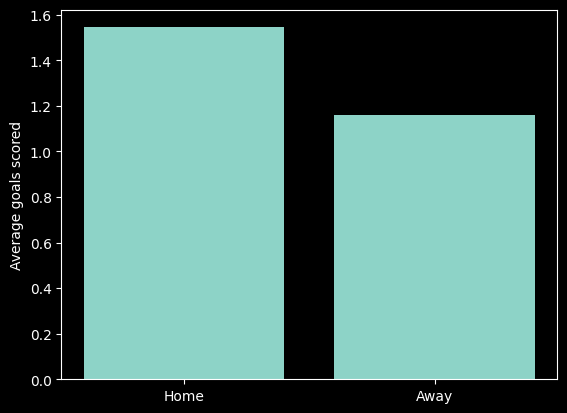

In [ ]:
# Calculate the average goals scored at home and away
avg_home_goals = matches['home_team_goal'].mean()
avg_away_goals = matches['away_team_goal'].mean()

# Plot the average goals scored at home and away
import matplotlib.pyplot as plt
plt.bar(['Home', 'Away'], [avg_home_goals, avg_away_goals])
plt.ylabel('Average goals scored')
plt.show()

## **Analysing Player's Data**

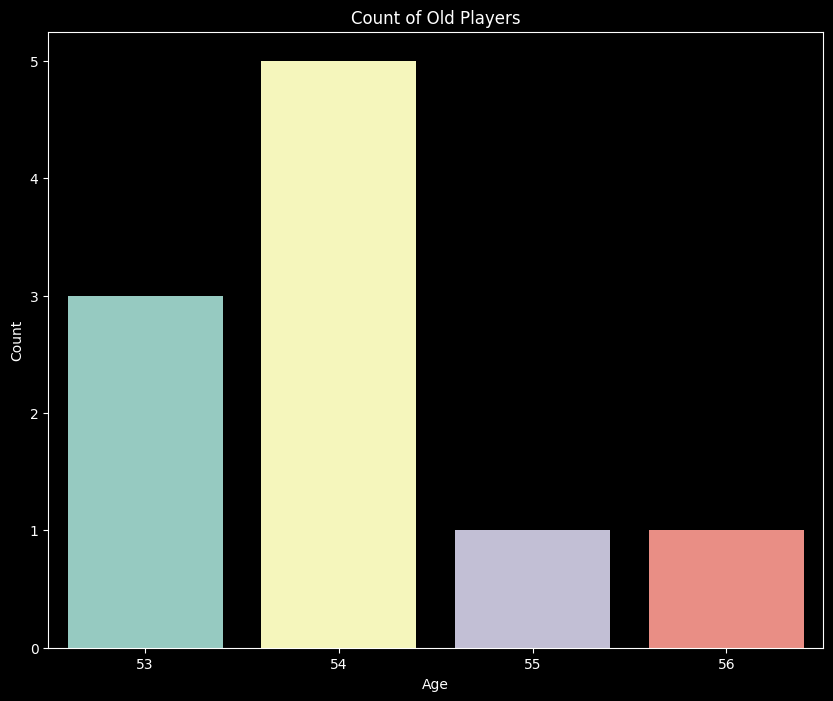

In [ ]:
#oldest player
import datetime as dt
today = pd.Timestamp.now() #writing this code on 15-10-2023
player['age']=(today - pd.to_datetime(player['birthday'])).dt.days // 365
oldest=player.nlargest(10,'age')
plt.figure(figsize=(10,8))
sns.countplot(x='age',data=oldest)
plt.title('Count of Old Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

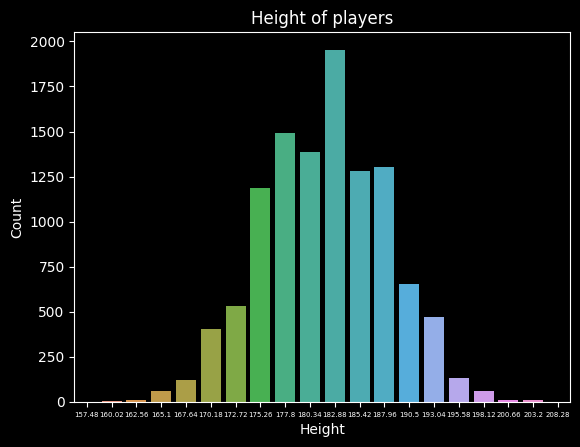

In [ ]:
#height of players
sns.countplot(data=player,x='height')
plt.title('Height of players')
plt.xlabel('Height')
plt.xticks(fontsize=5)
plt.ylabel('Count')

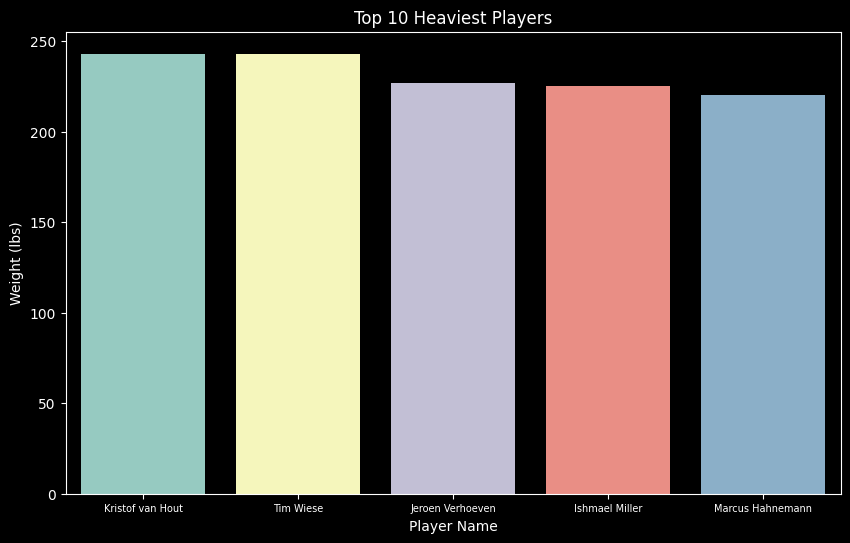

In [ ]:
#weight of players
'calling out the variable'
w = player.sort_values('weight', ascending=False).head(5)
plt.figure(figsize=(10, 6))
'plotting the plot and defining the x axis and y axis'
sns.barplot(data=w, x='player_name', y='weight')
'giving title to the plot'
plt.title('Top 10 Heaviest Players')
plt.xlabel('Player Name')
plt.ylabel('Weight (lbs)')
plt.xticks(fontsize=7)

plt.show()

## **Analysis of Player attributes**

       overall_rating      potential       crossing      finishing  \
count   183142.000000  183142.000000  183142.000000  183142.000000   
mean        68.600015      73.460353      55.086883      49.921078   
std          7.041139       6.592271      17.242135      19.038705   
min         33.000000      39.000000       1.000000       1.000000   
25%         64.000000      69.000000      45.000000      34.000000   
50%         69.000000      74.000000      59.000000      53.000000   
75%         73.000000      78.000000      68.000000      65.000000   
max         94.000000      97.000000      95.000000      97.000000   

           dribbling     shot_power  
count  183142.000000  183142.000000  
mean       59.175154      61.808427  
std        17.744688      16.135143  
min         1.000000       2.000000  
25%        52.000000      54.000000  
50%        64.000000      65.000000  
75%        72.000000      73.000000  
max        97.000000      97.000000  


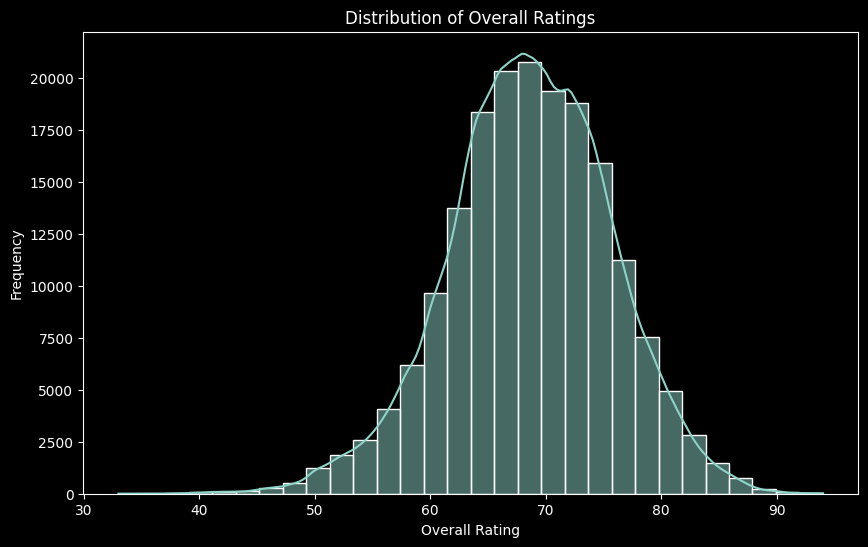

In [ ]:
# Overview of key player attributes
overview = player_attributes[['overall_rating', 'potential', 'crossing', 'finishing', 'dribbling', 'shot_power']]
print(overview.describe())

# Visualize the distribution of overall ratings


plt.figure(figsize=(10, 6))
sns.histplot(data=player_attributes, x='overall_rating', bins=30, kde=True)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.show()


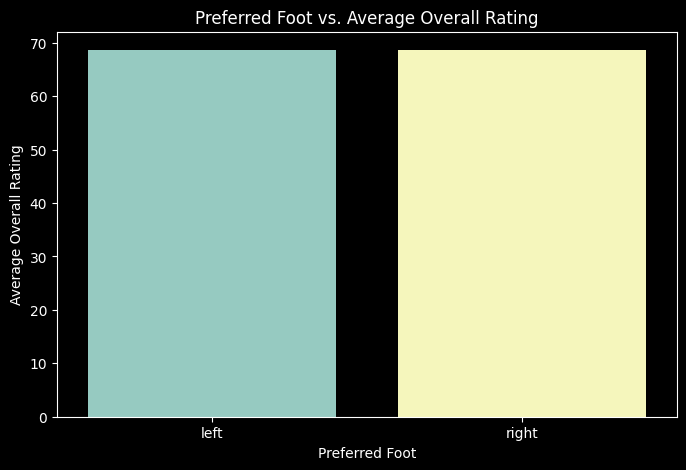

In [ ]:
# Analyze the effect of the preferred foot on overall rating
preferred_foot_rating = player_attributes.groupby('preferred_foot')['overall_rating'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=preferred_foot_rating.index, y=preferred_foot_rating.values)
plt.xlabel('Preferred Foot')
plt.ylabel('Average Overall Rating')
plt.title('Preferred Foot vs. Average Overall Rating')
plt.show()


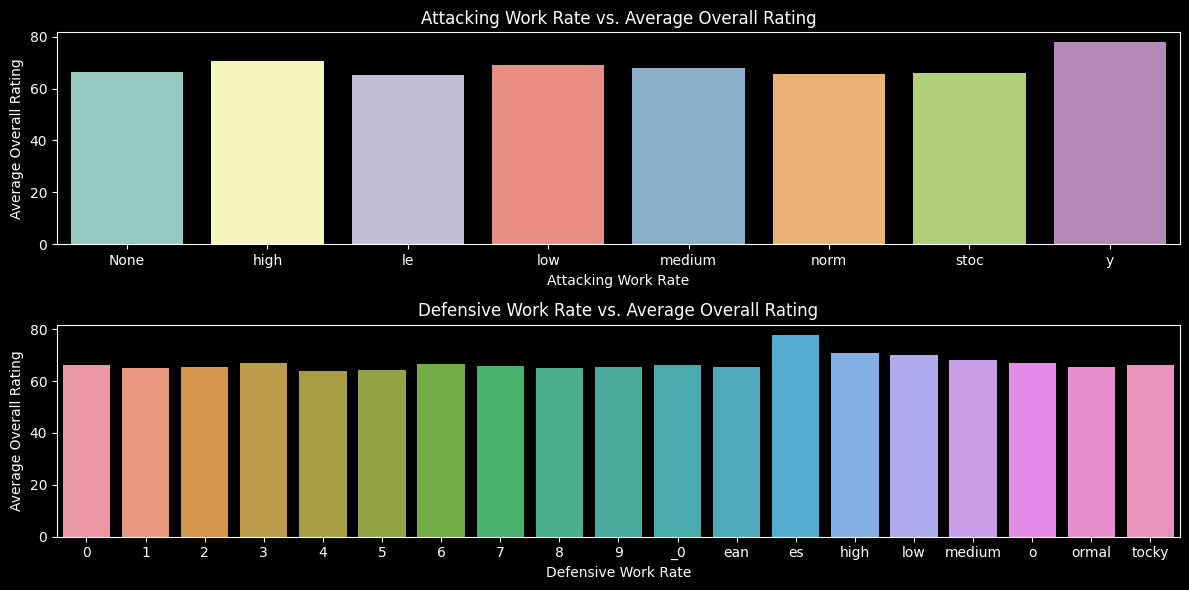

In [ ]:
# Analyze the effect of attacking and defensive work rates on overall rating
att_work_rate_rating = player_attributes.groupby('attacking_work_rate')['overall_rating'].mean()
def_work_rate_rating = player_attributes.groupby('defensive_work_rate')['overall_rating'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.barplot(x=att_work_rate_rating.index, y=att_work_rate_rating.values)
plt.xlabel('Attacking Work Rate')
plt.ylabel('Average Overall Rating')
plt.title('Attacking Work Rate vs. Average Overall Rating')

plt.subplot(2, 1, 2)
sns.barplot(x=def_work_rate_rating.index, y=def_work_rate_rating.values)
plt.xlabel('Defensive Work Rate')
plt.ylabel('Average Overall Rating')
plt.title('Defensive Work Rate vs. Average Overall Rating')

plt.tight_layout()
plt.show()


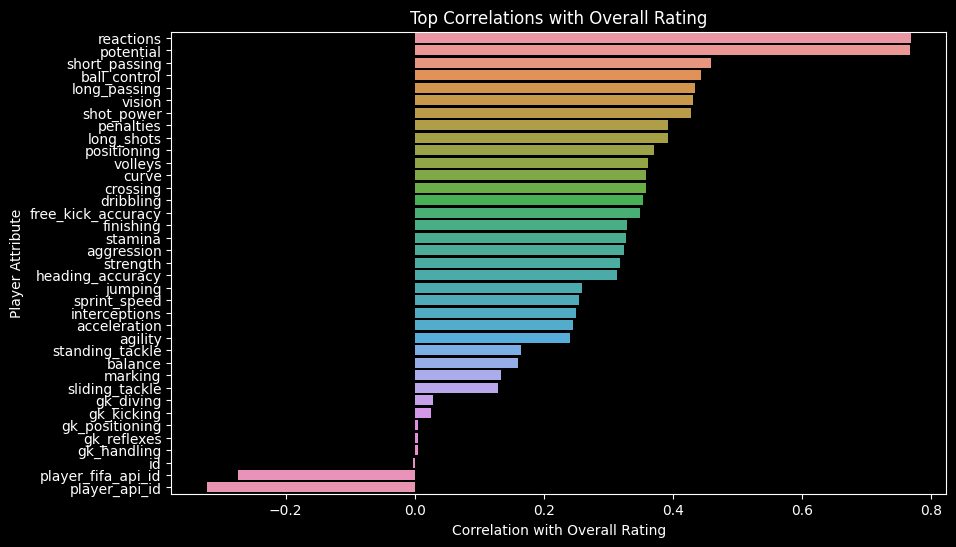

In [ ]:
# Calculate the correlation matrix
correlation_matrix = player_attributes.corr()

# Display the top correlations with overall rating
top_correlations = correlation_matrix['overall_rating'].sort_values(ascending=False)[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlations.values, y=top_correlations.index)
plt.xlabel('Correlation with Overall Rating')
plt.ylabel('Player Attribute')
plt.title('Top Correlations with Overall Rating')
plt.show()


## **Analysing Team attributes**

       buildUpPlaySpeed  chanceCreationPassing  chanceCreationCrossing  \
count       1458.000000            1458.000000             1458.000000   
mean          52.462277              52.165295               53.731824   
std           11.545869              10.360793               11.086796   
min           20.000000              21.000000               20.000000   
25%           45.000000              46.000000               47.000000   
50%           52.000000              52.000000               53.000000   
75%           62.000000              59.000000               62.000000   
max           80.000000              80.000000               80.000000   

       defencePressure  defenceAggression  
count      1458.000000        1458.000000  
mean         46.017147          49.251029  
std          10.227225           9.738028  
min          23.000000          24.000000  
25%          39.000000          44.000000  
50%          45.000000          48.000000  
75%          51.000000   

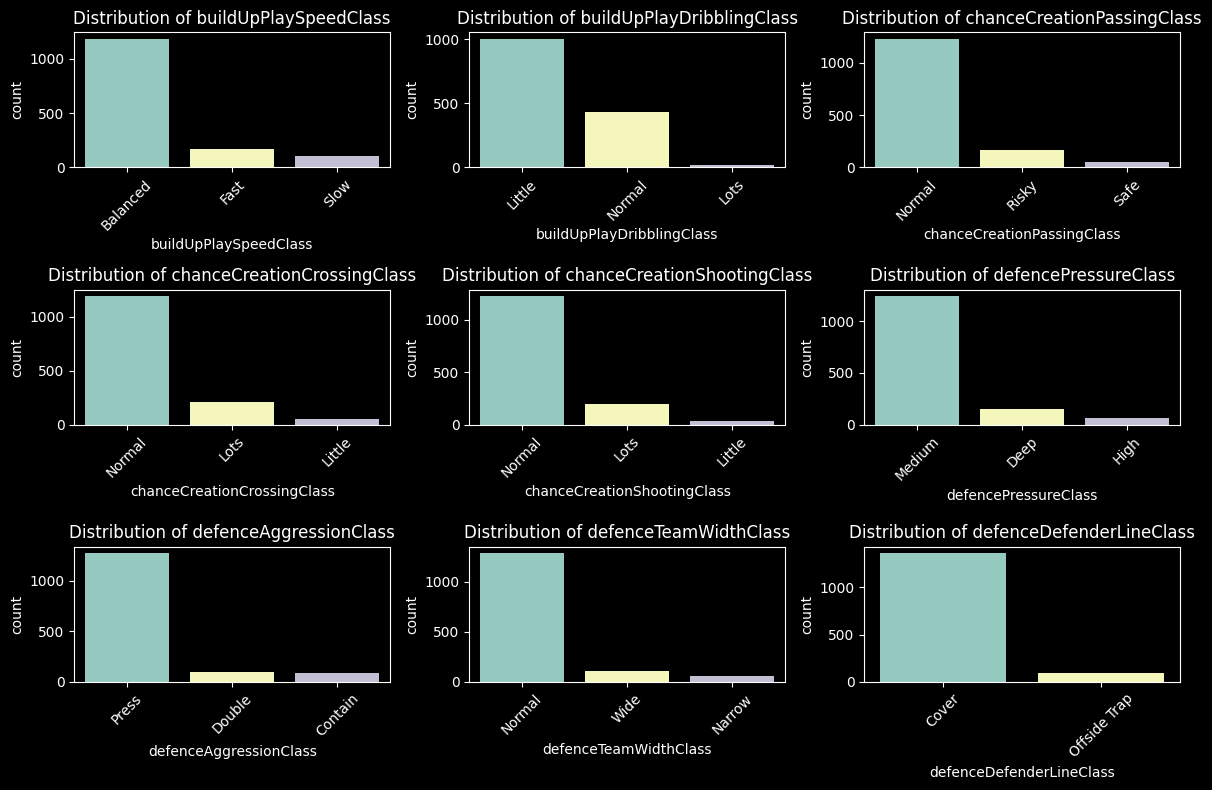

In [ ]:
# Overview of key team attributes
overview = team_attributes[['buildUpPlaySpeed', 'chanceCreationPassing', 'chanceCreationCrossing', 'defencePressure', 'defenceAggression']]
print(overview.describe())

# Analyze the distribution of attribute classes
attribute_classes = team_attributes[['buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'chanceCreationPassingClass',
                                  'chanceCreationCrossingClass', 'chanceCreationShootingClass', 'defencePressureClass',
                                  'defenceAggressionClass', 'defenceTeamWidthClass', 'defenceDefenderLineClass']]

# Plot the distribution of attribute classes
plt.figure(figsize=(12, 8))
for i, col in enumerate(attribute_classes.columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=attribute_classes, x=col, order=attribute_classes[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
